<a href="https://colab.research.google.com/github/iamharkirat/XAI/blob/main/understanding_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from IPython.display import Image, display
import cv2
from google.colab.patches import cv2_imshow

# Loading the data

In [ ]:
# Copy files from the specified drive locations to the current directory
shutil.copy("/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/updated_train_parent_images.zip", "/content")
shutil.copy("/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/updated_test_parent_images.zip", "/content")
shutil.copy("/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/updated_val_parent_images.zip", "/content")
shutil.copy("/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/updated_train_parent_none_images.zip", "/content")
shutil.copy("/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/updated_test_parent_none_images.zip", "/content")
shutil.copy("/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/updated_val_parent_none_images.zip", "/content")

'/content/updated_val_parent_none_images.zip'

In [ ]:
# Unzip the ZIP containing the untiled updated dataset
!unzip /content/updated_train_parent_images.zip
!unzip /content/updated_val_parent_images.zip
!unzip /content/updated_test_parent_images.zip
!unzip /content/updated_train_parent_none_images.zip
!unzip /content/updated_val_parent_none_images.zip
!unzip /content/updated_test_parent_none_images.zip

Archive:  /content/updated_train_parent_images.zip
   creating: updated_train_parent_images/
  inflating: updated_train_parent_images/Cam7-From09-05-50To10-09-24_Segment_8_x264_frame_359.jpg  
  inflating: updated_train_parent_images/parkland_school_shooting_1_frame_2_13.png  
  inflating: updated_train_parent_images/Cam7-From09-05-50To10-09-24_Segment_10_x264_frame_20.jpg  
  inflating: updated_train_parent_images/Cam7-From09-05-50To10-09-24_Segment_11_x264_frame_26.jpg  
  inflating: updated_train_parent_images/ocala_school_shooting_1_frame_3_132.png  
  inflating: updated_train_parent_images/ocala_school_shooting_1_frame_3_126.png  
  inflating: updated_train_parent_images/Cam7-From09-05-50To10-09-24_Segment_8_x264_frame_3711.jpg  
  inflating: updated_train_parent_images/bodycam_video_9_frame_4_4.png  
  inflating: updated_train_parent_images/police_video_8_frame_5_5.png  
  inflating: updated_train_parent_images/bodycam_video_8_frame_2_12.png  
  inflating: updated_train_parent_im

In [ ]:
# Moving the images from the "updated_train_parent_none_images", "updated_test_parent_none_images",
# and "updated_val_parent_none_images" folders to the corresponding "updated_train_parent_images",
# "updated_test_parent_images", and "updated_val_parent_images" folders.
!mv /content/updated_test_parent_none_images/* /content/updated_test_parent_images
!mv /content/updated_train_parent_none_images/* /content/updated_train_parent_images
!mv /content/updated_val_parent_none_images/* /content/updated_val_parent_images

In [ ]:
# Reading and combining the train, val and test CSV files (9 files) into 3 files (train, val, test respectively)
train_csv_list = ["/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds1-train-final--train.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds1-train-none-class--train.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds2-train-final--train.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds2-train-none-class--train.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds3-train-final--train.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds4-train-final--train.csv"]

val_csv_list = ["/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds1-val-final--val.csv",
                "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds1-val-none-class--val.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds2-val-final--val.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds3-val-final--val.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds4-val-final--val.csv"]

test_csv_list = ["/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds1-test-final--test.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds1-test-none-class--test.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds2-test-final--test.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds3-test-final--test.csv",
                  "/content/drive/MyDrive/XAI_CV_Research_Aide/ASU_police_project/base_model_dataset/updated_dataset_non_xai/csv_files/ds4-test-final--test.csv"]

def combine_csv_files(csv_file_path_list):
    """
    Combine multiple CSV files into a single pandas DataFrame.
    
    Args:
    csv_file_path_list (list): A list of file paths to CSV files.
    
    Returns:
    df_append (pandas DataFrame): A pandas DataFrame containing all the data from the CSV files.
    """
    # Initialize an empty DataFrame to store the combined data
    df_append = pd.DataFrame()
    
    # Loop through each file path in the list
    for file_path in csv_file_path_list:
        # Read the CSV file into a temporary DataFrame
        df_temp = pd.read_csv(file_path)
        
        # Print the length of the current CSV file
        print(f"Length of {file_path.split('/')[-1]}: {len(df_temp)}")
        
        # Append the data from the current CSV file to the combined DataFrame
        df_append = df_append.append(df_temp, ignore_index=True)
    
    return df_append

# Call the combine_csv_files function for each list of CSV file paths and store the results in separate DataFrames
combined_train_df = combine_csv_files(train_csv_list)   
combined_val_df = combine_csv_files(val_csv_list)   
combined_test_df = combine_csv_files(test_csv_list)   

# Print the lengths of each combined DataFrame
print(f"Length of combined_train_df: {len(combined_train_df)}")
print(f"Length of combined_val_df: {len(combined_val_df)}")
print(f"Length of combined_test_df: {len(combined_test_df)}")

Length of ds1-train-final--train.csv: 286
Length of ds1-train-none-class--train.csv: 14
Length of ds2-train-final--train.csv: 242
Length of ds2-train-none-class--train.csv: 27
Length of ds3-train-final--train.csv: 334
Length of ds4-train-final--train.csv: 41
Length of ds1-val-final--val.csv: 86
Length of ds1-val-none-class--val.csv: 7
Length of ds2-val-final--val.csv: 66
Length of ds3-val-final--val.csv: 42
Length of ds4-val-final--val.csv: 63
Length of ds1-test-final--test.csv: 57
Length of ds1-test-none-class--test.csv: 4
Length of ds2-test-final--test.csv: 98
Length of ds3-test-final--test.csv: 180
Length of ds4-test-final--test.csv: 21
Length of combined_train_df: 944
Length of combined_val_df: 264
Length of combined_test_df: 360


# Data Preprocessing

In [ ]:
# Local filepath to the images. Parent path.
LOCAL_TRAIN_PARENT_IMAGE_PATH = "/content/updated_train_parent_images"
LOCAL_VAL_PARENT_IMAGE_PATH = "/content/updated_val_parent_images"
LOCAL_TEST_PARENT_IMAGE_PATH = "/content/updated_test_parent_images"

In [ ]:
# Pivot the annotation df to get a new annotation df which can support multi-labels.
new_train_df = pd.pivot_table(combined_train_df, index=['image_name'], columns=['label'], aggfunc=len, fill_value=0).reset_index()
new_val_df = pd.pivot_table(combined_val_df, index=['image_name'], columns=['label'], aggfunc=len, fill_value=0).reset_index()
new_test_df = pd.pivot_table(combined_test_df, index=['image_name'], columns=['label'], aggfunc=len, fill_value=0).reset_index()

In [ ]:
df_class_list = ["CivilianWGun", "CivilianWoGun", "None","Officer"] 

In [ ]:
new_train_df = new_train_df.sample(frac=1).reset_index(drop=True)
new_val_df = new_val_df.sample(frac=1).reset_index(drop=True)
new_test_df = new_test_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Note: only the Texas Uvalde vid has the multi-label. This is for dataset iteration 1.
new_train_df[(new_train_df.CivilianWoGun==1)&(new_train_df.CivilianWGun==1)].head()

label,image_name,CivilianWGun,CivilianWoGun,None,Officer
18,Cam7-From09-05-50To10-09-24_Segment_10_x264_fr...,1,1,0,0
28,Cam7-From09-05-50To10-09-24_Segment_8_x264_fra...,1,1,0,0
40,parkland_school_shooting_1_frame_6_32.png,1,1,0,0
43,Cam7-From09-05-50To10-09-24_Segment_8_x264_fra...,1,1,0,0
64,Cam7-From09-05-50To10-09-24_Segment_10_x264_fr...,1,1,0,0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions

image_height = 256
image_width = 256

# Set up data generators for training, validation, and testing sets

train_datagen = ImageDataGenerator(
                                   rescale=1./255, # Normalize pixel values to [0, 1]
                                   rotation_range=30, # Randomly rotate the image up to 30 degrees
                                   width_shift_range=0.1, # Randomly shift the width of the image by up to 10%
                                   height_shift_range=0.1, # Randomly shift the height of the image by up to 10%
                                   shear_range=0.2, # Randomly shear the image up to 20%
                                   zoom_range=0.2, # Randomly zoom the image up to 20%
                                   horizontal_flip=True, # Randomly flip the image horizontally
                                   vertical_flip=False, # Do not randomly flip the image vertically
                                   fill_mode='nearest' # Fill any missing pixels with the nearest pixel value
                                   )

train_generator = train_datagen.flow_from_dataframe(
                                                    dataframe=new_train_df,
                                                    directory=LOCAL_TRAIN_PARENT_IMAGE_PATH,
                                                    x_col="image_name",
                                                    y_col=df_class_list,
                                                    classes=df_class_list,
                                                    batch_size=32,
                                                    seed=42,
                                                    shuffle=True, 
                                                    class_mode="raw", 
                                                    target_size=(image_height, image_width)
                                                    )

val_datagen = ImageDataGenerator(rescale=1./255) 

val_generator = val_datagen.flow_from_dataframe(
                                                dataframe=new_val_df,
                                                directory=LOCAL_VAL_PARENT_IMAGE_PATH,
                                                x_col="image_name",
                                                y_col=df_class_list,
                                                classes=df_class_list,
                                                batch_size=32,
                                                seed=42,
                                                shuffle=True, 
                                                class_mode="raw", 
                                                target_size=(image_height, image_width)
                                                )

test_datagen = ImageDataGenerator(rescale=1./255) 

test_generator = test_datagen.flow_from_dataframe(
                                                  dataframe=new_test_df,
                                                  directory=LOCAL_TEST_PARENT_IMAGE_PATH,
                                                  x_col="image_name",
                                                  y_col=df_class_list,
                                                  classes=df_class_list,
                                                  batch_size=32,
                                                  seed=42,
                                                  shuffle=True, 
                                                  class_mode="raw", 
                                                  target_size=(image_height, image_width)
                                                  )

Found 822 validated image filenames.
Found 247 validated image filenames.
Found 238 validated image filenames.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1071: UserWarning: `classes` will be ignored given the class_mode="raw"
  warnings.warn(


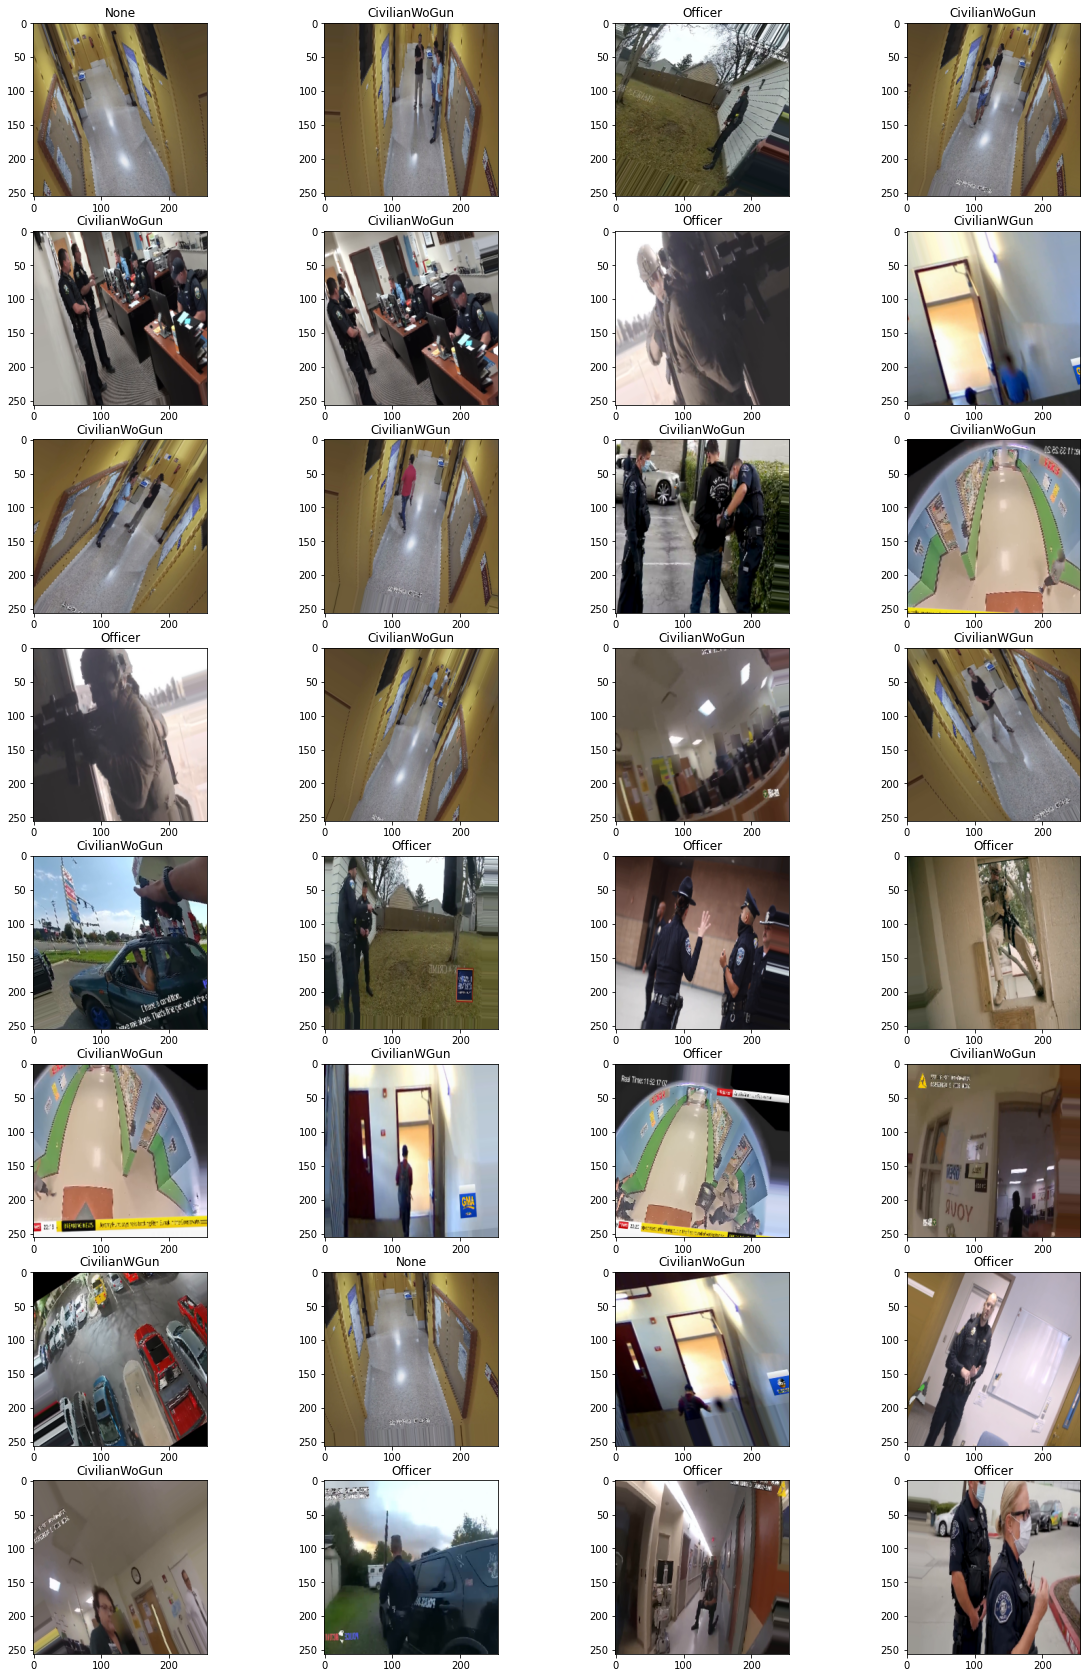

In [ ]:
n_row = 8
n_col = 4
batch_index = 1

# Get the next batch from the train generator
batch = train_generator.next()

# Create a figure with subplots
fig, axs = plt.subplots(n_row, n_col, figsize=(20, 30))

# Flatten the subplots into a 1D array
axs = axs.flatten()

# Iterate over each image in the batch
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
    
    # Set the title of the subplot to the predicted class of the image
    ax = axs[i]
    ax.set_title(df_class_list[np.argmax(label, axis=0)])
    
    # Display the image in the subplot
    ax.imshow(image)
    
# Show the plot
plt.show()

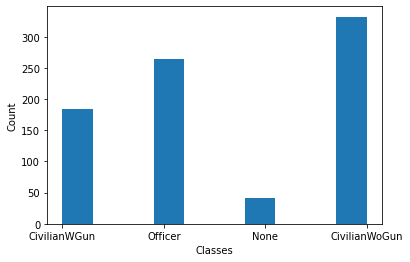

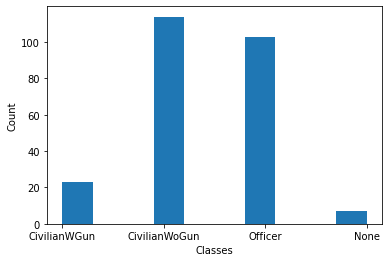

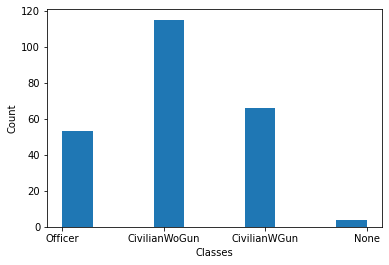

In [ ]:
def plot_data_hist(data_df, save_name):
    # Get all the labels as one-hot encoded arrays
    all_labels = data_df[df_class_list].values.tolist()
    new_label_list = []
    # For each one-hot encoded array, get the corresponding class label
    for one_hot_array in all_labels:
        new_label_list.append(df_class_list[np.argmax(np.array(one_hot_array))])
    # Plot a histogram of the class labels
    plt.hist(new_label_list)
    plt.xlabel('Classes')
    plt.ylabel('Count')
    # Save the plot to the specified file name and show the plot
    plt.savefig(save_name, bbox_inches='tight')
    plt.show()

# Call the function on the three dataframes and save the plots to specified file names
plot_data_hist(new_train_df, "updated_train_split.png")
plot_data_hist(new_val_df, "updated_val_split.png")
plot_data_hist(new_test_df, "updated_test_split.png")

# Models

In [ ]:
import tensorflow as tf
tf.config.threading.set_inter_op_parallelism_threads(4)

In [18]:
num_classes = len(df_class_list)

## VGG 16

In [22]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras import regularizers

# Load the pre-trained VGG16 model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(image_height, image_width, 3))

# Freeze all layers of the Inception-v3 model
for i, layer in enumerate(base_model.layers):
    if i >= 10:  # change this number to select the layer index to start unfreezing from
        layer.trainable = True

# Add some fully connected layers on top of the base model with dropout and L2 regularization
x = Flatten()(base_model.output)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='sigmoid')(x)

# Create the new model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Compile the model with AUC as an additional metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model with more epochs
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
26/26 [==============================] - 51s 2s/step - loss: 1.7825 - accuracy: 0.3297 - auc_3: 0.6229 - val_loss: 0.9173 - val_accuracy: 0.4615 - val_auc_3: 0.7541
Epoch 2/10
26/26 [==============================] - 40s 2s/step - loss: 0.8715 - accuracy: 0.3504 - auc_3: 0.6612 - val_loss: 0.7252 - val_accuracy: 0.4615 - val_auc_3: 0.7876
Epoch 3/10
26/26 [==============================] - 40s 2s/step - loss: 0.7791 - accuracy: 0.4015 - auc_3: 0.7011 - val_loss: 0.6883 - val_accuracy: 0.4615 - val_auc_3: 0.8054
Epoch 4/10
26/26 [==============================] - 40s 2s/step - loss: 0.7361 - accuracy: 0.3832 - auc_3: 0.6994 - val_loss: 0.6728 - val_accuracy: 0.4615 - val_auc_3: 0.8173
Epoch 5/10
26/26 [==============================] - 44s 2s/step - loss: 0.7001 - accuracy: 0.3942 - auc_3: 0.7148 - val_loss: 0.5944 - val_accuracy: 0.6842 - val_auc_3: 0.9024
Epoch 6/10
26/26 [==============================] - 41s 2s/step - loss: 0.6676 - accuracy: 0.4221 - auc_3: 0.7416 - val_

## ResNet50

In [23]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Load the pre-trained ResNet50 model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(image_height, image_width, 3))

# Freeze all layers of the ResNet50 model
for layer in base_model.layers:
    layer.trainable = False

# Add some fully connected layers on top of the base model with dropout and L2 regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='sigmoid')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with AUC as an additional metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

# Train the model with more epochs
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
26/26 [==============================] - 42s 1s/step - loss: 1.0360 - accuracy: 0.3394 - auc_4: 0.6498 - val_loss: 0.7461 - val_accuracy: 0.5506 - val_auc_4: 0.8595
Epoch 2/10
26/26 [==============================] - 42s 2s/step - loss: 0.7453 - accuracy: 0.3662 - auc_4: 0.6946 - val_loss: 0.6132 - val_accuracy: 0.4170 - val_auc_4: 0.8313
Epoch 3/10
26/26 [==============================] - 41s 2s/step - loss: 0.6789 - accuracy: 0.4051 - auc_4: 0.7096 - val_loss: 0.5844 - val_accuracy: 0.6923 - val_auc_4: 0.9089
Epoch 4/10
26/26 [==============================] - 41s 2s/step - loss: 0.6528 - accuracy: 0.3954 - auc_4: 0.7084 - val_loss: 0.5677 - val_accuracy: 0.6316 - val_auc_4: 0.8845
Epoch 5/10
26/26 [==============================] - 41s 2s/step - loss: 0.6264 - accuracy: 0.4343 - auc_4: 0.7274 - val_loss: 0.5441 - val_accuracy: 0.6397 - val_auc_4: 0.8950
Epoch 6/10
26/26 [==============================] - 41s 2s/step - loss: 0.6100 - accuracy: 0.4331 - auc_4: 0.7360 - val_

## InveptionV3

In [24]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(image_height, image_width, 3))

# Freeze all layers of the Inception-v3 model
for i, layer in enumerate(base_model.layers):
    if i >= 10:  # change this number to select the layer index to start unfreezing from
        layer.trainable = True

# Add some fully connected layers on top of the base model with dropout and L2 regularization
x = Flatten()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='sigmoid')(x)

# Create the new model
model = tf.keras.Model(inputs=base_model.input, outputs=output)

# Learning rate schedule
def lr_schedule(epoch):
    lr = 0.0001
    if epoch > 5:
        lr *= 0.1
    return lr

num_epochs = 10

# Compile the model with AUC as an additional metric
optimizer = Adam(learning_rate=lr_schedule(0))
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

# Use a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with more epochs and callbacks
history = model.fit(train_generator, epochs=num_epochs, validation_data=val_generator, callbacks=[lr_scheduler])

Epoch 1/10
26/26 [==============================] - 74s 2s/step - loss: 13.2871 - accuracy: 0.4891 - auc_5: 0.7449 - val_loss: 11.9381 - val_accuracy: 0.7611 - val_auc_5: 0.9180 - lr: 1.0000e-04
Epoch 2/10
26/26 [==============================] - 39s 1s/step - loss: 11.0059 - accuracy: 0.5925 - auc_5: 0.8575 - val_loss: 10.2264 - val_accuracy: 0.7126 - val_auc_5: 0.8864 - lr: 1.0000e-04
Epoch 3/10
26/26 [==============================] - 39s 1s/step - loss: 9.2437 - accuracy: 0.6496 - auc_5: 0.9017 - val_loss: 8.5738 - val_accuracy: 0.7773 - val_auc_5: 0.9165 - lr: 1.0000e-04
Epoch 4/10
26/26 [==============================] - 38s 1s/step - loss: 7.8769 - accuracy: 0.6922 - auc_5: 0.9284 - val_loss: 7.4404 - val_accuracy: 0.7733 - val_auc_5: 0.9147 - lr: 1.0000e-04
Epoch 5/10
26/26 [==============================] - 42s 2s/step - loss: 6.8032 - accuracy: 0.7251 - auc_5: 0.9398 - val_loss: 6.4664 - val_accuracy: 0.7571 - val_auc_5: 0.9219 - lr: 1.0000e-04
Epoch 6/10
26/26 [=============

# Pytorch

#EXPERIMENTS

In [25]:
FOLDER_PATH = "/content/updated_test_parent_images"

def load_image(img_file_name):
    # check if the entered image file name exists in the directory
    img_path = os.path.join(FOLDER_PATH, img_file_name)
    if not os.path.exists(img_path):
        print("Invalid image file name.")
        return None
    # read and return the image
    img = cv2.imread(img_path)
    return img

In [26]:
img=load_image('Cam5-From09-24-18To09-26-43-Guns_x264_Segment_1_x264_frame_119.jpg')

In [27]:
img.shape

(1080, 1920, 3)

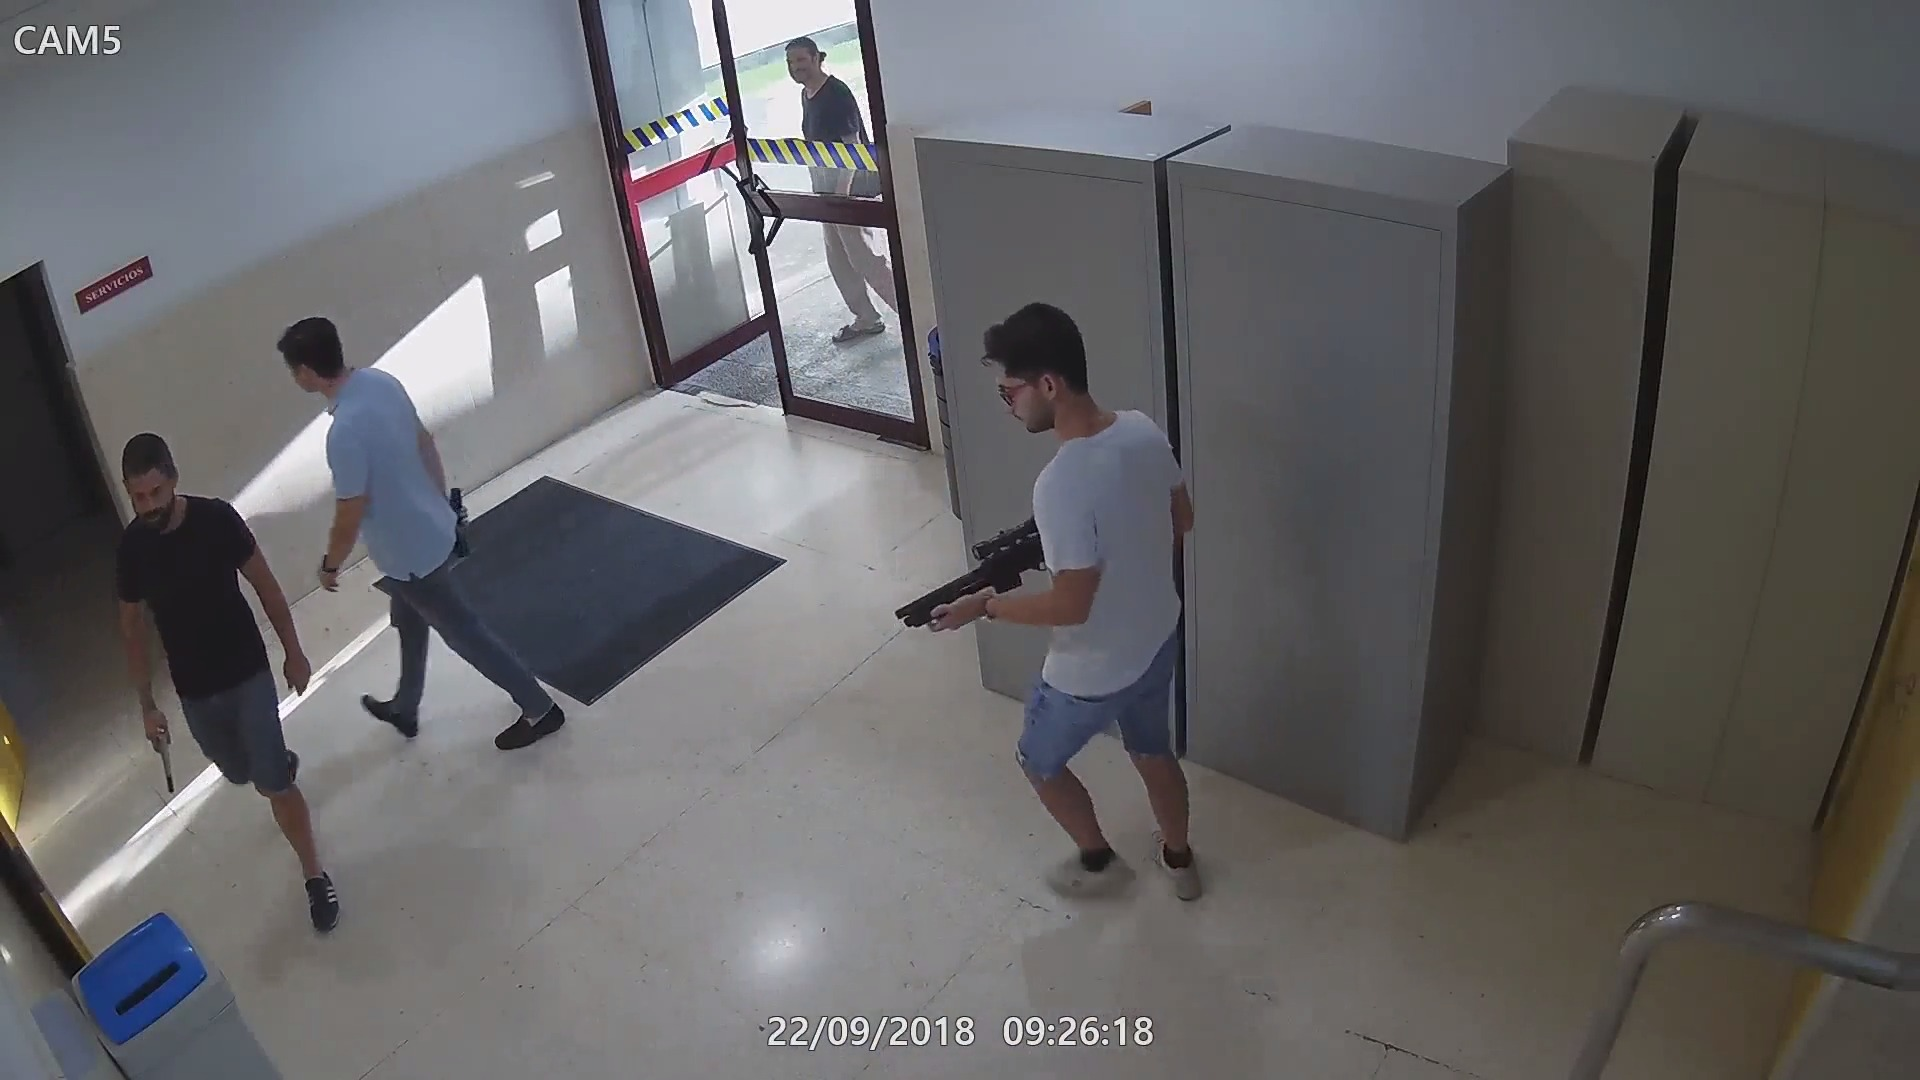

In [28]:
cv2_imshow(img)

## YOLO3

In [29]:
# Step 1: Install Dependencies
# You can install OpenCV and Darknet using pip or conda

# Install OpenCV using pip
!pip install opencv-python

# Install Darknet using git clone and make commands
!git clone https://github.com/AlexeyAB/darknet.git
%cd darknet
!make

# Step 2: Download Pre-Trained YOLO Model
# Download pre-trained YOLOv3 model weights and configuration file
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://pjreddie.com/media/files/yolov3.cfg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.18 MiB | 8.30 MiB/s, done.
Resolving deltas: 100% (10412/10412), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
  253 |                 int n = _write(client, outputbuf, outlen)

In [30]:
!./darknet detector test cfg/coco.data cfg/yolov3.cfg yolov3.weights -thresh 0.3 /content/updated_test_parent_images/Cam5-From09-24-18To09-26-43-Guns_x264_Segment_1_x264_frame_119.jpg -dont_show

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  